# Introduction

In the class of machine learning approaches that are based on tree-like decision makers, many improved algorithms have been developed over the past two decades. We will go through three noteworthy designs that build on the idea of ensembles. The general idea is to train multiple models and combine them in various ways to improve performance.

There are two primary ways of doing this when it comes to decision trees. The first is to average the output of multiple trees which limits the variance of the output given the central limit theorem. The second way is to build trees in sequence and use the output of each one to reduce the bias in the next one.

# Bagging Regressor
A Bagging model works by dividing a dataset, training one tree per subset, and averaging the results. There are variants of the Bagging approach with distinct names determined by how the data is divided (i.e. Pasting, Bagging, Random Subspaces, Random Patches, etc...).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_covtype

In [2]:
# covtype is a moderately complex "real world" dataset
# it might take a minute to download the dataset

covtype = fetch_covtype()

x, xt, y, yt = train_test_split(covtype.data, covtype.target, test_size = 0.20)

print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [3]:
# now that datasets are bigger, training takes marginally longer
# we will intentionally restrict depth to make differences more apparent

m = DecisionTreeClassifier(max_depth=15)

m.fit(x, y)

ŷ = m.predict(xt)
accuracy_score(yt, ŷ)

0.8522843644312109

In [4]:
confusion_matrix(yt, ŷ)

array([[35111,  7087,     2,     0,     8,    14,   238],
       [ 4986, 50962,   219,     2,    81,   162,    28],
       [    3,   418,  6099,    25,     8,   642,     0],
       [    0,     0,   149,   391,     0,    28,     0],
       [   56,  1160,    22,     0,   660,     7,     0],
       [   13,   660,   573,    24,     7,  2216,     0],
       [  484,    59,     0,     0,     0,     0,  3599]], dtype=int64)

Text(0.5, 1.0, 'Mean AUC 0.85')

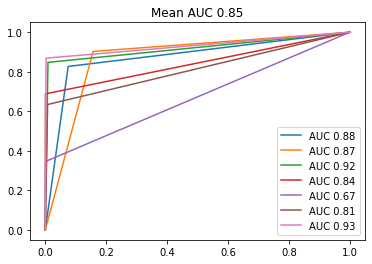

In [5]:
# compute ROC curves for each class and plot them

plt.close('all')

ytb = label_binarize(yt, classes=np.union1d(y, yt))
ŷb = label_binarize(ŷ, classes=np.union1d(y, yt))

fig, ax = plt.subplots()
area = []
for i in range(len(np.union1d(y, yt))):
    fpr, tpr, _ = roc_curve(ytb[:,i], ŷb[:,i])
    a = auc(fpr, tpr)
    area.append(a)
    plt.plot(fpr, tpr, label='AUC %0.2f' % a)

plt.legend(loc="lower right")
plt.title("Mean AUC %0.2f" % np.mean(area))

In [6]:
# we are training the same tree but using bagging
# set the number of estimators to the number of CPUs on your computer

mb = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                       n_estimators=32,
                       verbose=1,
                       n_jobs=-1)

mb.fit(x, y)

ŷ = mb.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   2 out of  32 | elapsed:   11.9s remaining:  3.0min
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:   12.9s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   2 out of  32 | elapsed:    0.3s remaining:    6.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.6s finished


0.8817844633959536

Text(0.5, 1.0, 'Mean AUC 0.87')

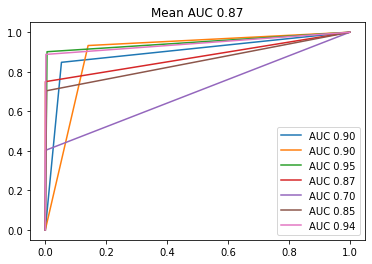

In [7]:
# compute ROC curves for each class and plot them

plt.close('all')

ytb = label_binarize(yt, classes=np.union1d(y, yt))
ŷb = label_binarize(ŷ, classes=np.union1d(y, yt))

fig, ax = plt.subplots()
area = []
for i in range(len(np.union1d(y, yt))):
    fpr, tpr, _ = roc_curve(ytb[:,i], ŷb[:,i])
    a = auc(fpr, tpr)
    area.append(a)
    plt.plot(fpr, tpr, label='AUC %0.2f' % a)

plt.legend(loc="lower right")
plt.title("Mean AUC %0.2f" % np.mean(area))

# Random Forest
In random forests each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset.

In [8]:
# we need to set the maximum number of features explicitly 
# for a 1:1 comparison with DecisionTreeClassifier

mrf = RandomForestClassifier(max_depth=15, max_features=54, n_estimators=32, verbose=1, n_jobs=-1)

mrf.fit(x, y)

ŷ = mrf.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  32 | elapsed:    9.5s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   10.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   2 out of  32 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.0s finished


0.8822319561457105

In [9]:
# A forest does not overfit as easily as a single tree so we can increase depth

mrf = RandomForestClassifier(max_features=54, n_estimators=32, verbose=1, n_jobs=-1)

mrf.fit(x, y)

ŷ = mrf.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  32 | elapsed:   10.0s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   11.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   2 out of  32 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.0s finished


0.9654483963408862

In [10]:
# Other parameter changes provide only marginal gains
# Doubling the number of trees makes a negligible difference

mrf = RandomForestClassifier(max_features=54, n_estimators=64, verbose=1, n_jobs=-1)

mrf.fit(x, y)

ŷ = mrf.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   21.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  64 out of  64 | elapsed:    0.1s finished


0.9666617901431116

# Gradient Tree Boosting

In [16]:
import xgboost as xgb

In [12]:
# since we're building a multiclass classifier we use softmax
# this model will score about as well as the best Random Forest

p = {'objective':'multi:softmax',
     'eta':0.2,
     'max_depth':30,
     'num_class':54,
     'eval_metric':'merror',
     'nthread':'32'}

# XGBoost wants the data serialized into a data structure called Dmatrix
dat = xgb.DMatrix(x, label=y)
datt = xgb.DMatrix(xt, label=yt)
watch = [(dat, 'train'), (datt, 'test')]
score = {}

mxgb = xgb.train(p, dat, 50, watch, evals_result=score)

[0]	train-merror:0.10778	test-merror:0.12069
[1]	train-merror:0.09150	test-merror:0.10730
[2]	train-merror:0.07017	test-merror:0.09255
[3]	train-merror:0.05081	test-merror:0.07988
[4]	train-merror:0.03852	test-merror:0.07131
[5]	train-merror:0.02972	test-merror:0.06542
[6]	train-merror:0.02288	test-merror:0.06065
[7]	train-merror:0.01767	test-merror:0.05718
[8]	train-merror:0.01345	test-merror:0.05395
[9]	train-merror:0.01033	test-merror:0.05112
[10]	train-merror:0.00772	test-merror:0.04879
[11]	train-merror:0.00579	test-merror:0.04705
[12]	train-merror:0.00432	test-merror:0.04536
[13]	train-merror:0.00326	test-merror:0.04386
[14]	train-merror:0.00237	test-merror:0.04213
[15]	train-merror:0.00169	test-merror:0.04115
[16]	train-merror:0.00123	test-merror:0.03981
[17]	train-merror:0.00086	test-merror:0.03900
[18]	train-merror:0.00058	test-merror:0.03812
[19]	train-merror:0.00039	test-merror:0.03747
[20]	train-merror:0.00025	test-merror:0.03686
[21]	train-merror:0.00016	test-merror:0.0360

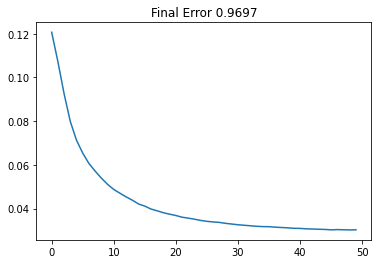

In [13]:
plt.close('all')

epoch = list(range(len(score['test']['merror'])))
ŷ = mxgb.predict(datt)
s = accuracy_score(yt, ŷ)

plt.plot(epoch, score['test']['merror'], label='test')
plt.title("Final Error %0.4f" % s)
plt.show()

In [14]:
cv_results = xgb.cv(dtrain=dat, params=p,
                    nfold=7,
                    num_boost_round=5,
                    metrics="merror",
                    verbose_eval=True,
                    as_pandas=True)

[0]	train-merror:0.11577+0.00165	test-merror:0.12936+0.00234
[1]	train-merror:0.09731+0.00147	test-merror:0.11532+0.00194
[2]	train-merror:0.07492+0.00068	test-merror:0.09895+0.00155
[3]	train-merror:0.05460+0.00032	test-merror:0.08527+0.00171
[4]	train-merror:0.04085+0.00045	test-merror:0.07593+0.00161


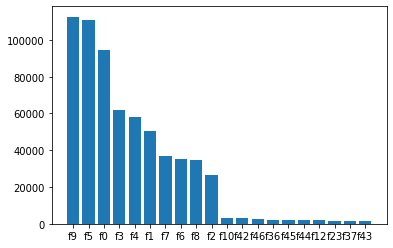

In [38]:
import operator

importance = dict(reversed(sorted(mxgb.get_score().items(), key=operator.itemgetter(1))))

# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.bar(list(importance.keys())[0:20], list(importance.values())[0:20])
plt.show()